# LIVECell 시각화

In [ ]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random

%matplotlib inline

In [ ]:
coco = COCO('./data/LIVECell_dataset_2021/livecell_coco_train.json')
img_dir = './data/LIVECell_dataset_2021/images/livecell_train_val_images'

loading annotations into memory...
Done (t=20.42s)
creating index...
index created!


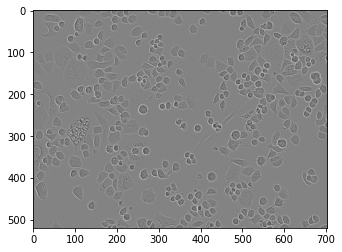

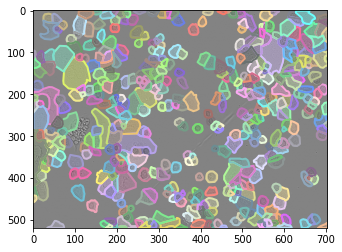

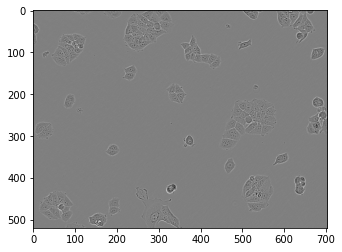

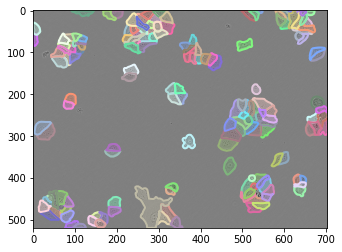

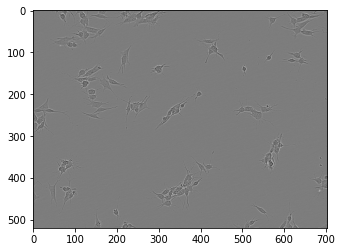

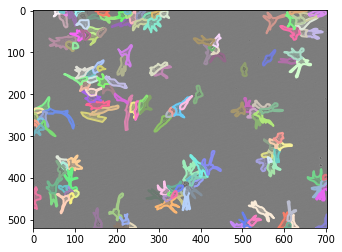

In [ ]:
#이미지 아이디 랜덤하게 3개 샘플링
imgIds = random.sample(coco.getImgIds(), 3)
for imgid in imgIds:
    img = coco.imgs[imgid]
    image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
    plt.imshow(Image.open(os.path.join(img_dir, img['file_name'])), cmap='gray')
    plt.show()

    anns_ids = coco.getAnnIds(imgIds=imgid)
    anns = coco.loadAnns(anns_ids)
    plt.imshow(Image.open(os.path.join(img_dir, img['file_name'])), cmap='gray')
    coco.showAnns(anns)
    plt.show()

# Kaggle 데이터 시각화

loading annotations into memory...
Done (t=0.93s)
creating index...
index created!


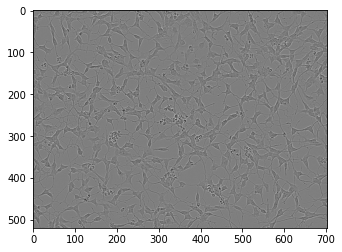

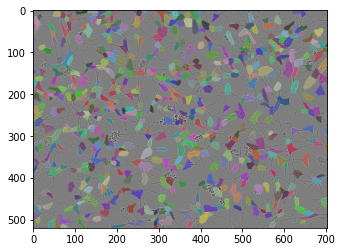

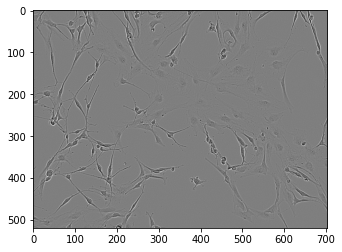

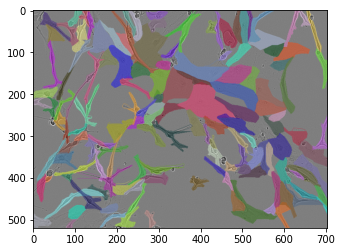

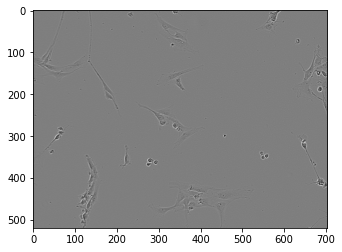

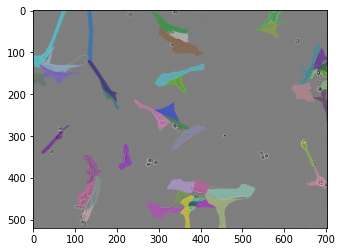

In [ ]:
coco = COCO('./data/dtrainval.json')
img_dir = './data/train'

#이미지 아이디 랜덤하게 3개 샘플링
imgIds = random.sample(coco.getImgIds(), 3)
for imgid in imgIds:
    img = coco.imgs[imgid]
    image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
    plt.imshow(Image.open(os.path.join(img_dir, img['file_name'])), cmap='gray')
    plt.show()

    anns_ids = coco.getAnnIds(imgIds=imgid)
    anns = coco.loadAnns(anns_ids)
    plt.imshow(Image.open(os.path.join(img_dir, img['file_name'])), cmap='gray')
    coco.showAnns(anns)
    plt.show()

# Kaggle YOLOX 학습 결과 시각화

In [ ]:
from mmdet.apis import init_detector, inference_detector

config_path = './work_dirs/yolox_x_kaggle/yolox_x_kaggle.py'
checkpoint_path = './work_dirs/yolox_x_kaggle/epoch_15.pth'

model = init_detector(config_path, checkpoint_path, device='cuda:0')

load checkpoint from local path: ./work_dirs/yolox_x_kaggle/epoch_15.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_backbone_stem_conv_conv_weight, ema_backbone_stem_conv_bn_weight, ema_backbone_stem_conv_bn_bias, ema_backbone_stem_conv_bn_running_mean, ema_backbone_stem_conv_bn_running_var, ema_backbone_stem_conv_bn_num_batches_tracked, ema_backbone_stage1_0_conv_weight, ema_backbone_stage1_0_bn_weight, ema_backbone_stage1_0_bn_bias, ema_backbone_stage1_0_bn_running_mean, ema_backbone_stage1_0_bn_running_var, ema_backbone_stage1_0_bn_num_batches_tracked, ema_backbone_stage1_1_main_conv_conv_weight, ema_backbone_stage1_1_main_conv_bn_weight, ema_backbone_stage1_1_main_conv_bn_bias, ema_backbone_stage1_1_main_conv_bn_running_mean, ema_backbone_stage1_1_main_conv_bn_running_var, ema_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_backbone_stage1_1_short_conv_conv_weight, ema_backbone_stage1_1_short_conv_bn_weight, ema_backbone_s

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import time
from pycocotools.coco import COCO

valid_coco = COCO('./data/dval_g0.json')
valid_img_infos = valid_coco.loadImgs(valid_coco.getImgIds())
image_list = [v['file_name'] for v in valid_img_infos]

image_path = './data/train'

start = time.time()

# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음. 
result = []
for image in image_list:
    result.append(inference_detector(model, os.path.join(image_path, image)))
    
end = time.time()
print(str((end-start)/len(image_list)) + ' sec per image')

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/mmdet/models/dense_heads/yolox_head.py:286: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  scale_factors).unsqueeze(1)


0.12361730003356934 sec per image


In [ ]:
import shutil

result_path = 'result/yolox_x_kaggle'

for i in range(len(image_list)):
    image = os.path.join(image_path, image_list[i])

    # inference box가 그려진 이미지 저장
    model.show_result(image, result[i],
                      out_file=os.path.join(result_path, f'img_{i}_result.jpg'), score_thr=0.4)
    # 원본 이미지 저장
    shutil.copy(image, os.path.join(result_path, f'img_{i}_src.jpg'))

# Kaggle UPerNet crop 이미지 시각화

In [ ]:
from mmseg.apis import init_segmentor, inference_segmentor

config_path = './work_dirs/upernet_kaggle/upernet_kaggle.py'
checkpoint_path = './work_dirs/upernet_kaggle/iter_1000.pth'

model = init_segmentor(config_path, checkpoint_path, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmseg/models/losses/cross_entropy_loss.py:226: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: ./work_dirs/upernet_kaggle/iter_1000.pth


In [ ]:
import os
import time
import random
from tqdm import tqdm

image_path = './data/segmentation/images/valid_g0'
image_list = os.listdir(image_path)
image_list = random.sample(image_list, 500)

start = time.time()

# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음. 
result = []
for image in tqdm(image_list):
    result.append(inference_segmentor(model, os.path.join(image_path, image)))
    
end = time.time()
print(str((end-start)/len(image_list)) + ' sec per image')

100%|██████████| 500/500 [00:17<00:00, 28.28it/s]

0.03536668872833252 sec per image


In [ ]:
import shutil

result_path = './result/upernet_kaggle'

for i in tqdm(range(len(image_list))):
    image = os.path.join(image_path, image_list[i])

    model.show_result(image, result[i],
                        out_file=os.path.join(result_path, f'img_{i}_result.jpg'), opacity=0.5)
    # 원본 이미지 저장
    shutil.copy(image, os.path.join(result_path, f'img_{i}_src.jpg'))

100%|██████████| 500/500 [00:00<00:00, 1509.09it/s]


# Kaggle UPerNet 전체 이미지 시각화

In [ ]:
from mmseg.apis import init_segmentor, inference_segmentor

config_path = './work_dirs/upernet_kaggle/upernet_kaggle.py'
checkpoint_path = './work_dirs/upernet_kaggle/iter_1000.pth'

model = init_segmentor(config_path, checkpoint_path, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmseg/models/losses/cross_entropy_loss.py:226: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: ./work_dirs/upernet_kaggle/iter_1000.pth


In [ ]:
import os
from tqdm import tqdm
from PIL import Image
import numpy as np
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import random

image_path = './data/train'
coco_path = './data/dval_g0.json'
crop_image_path = './data/segmentation/images/valid_g0'

val_coco = COCO(coco_path)

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


  0%|          | 0/10 [00:00<?, ?it/s]

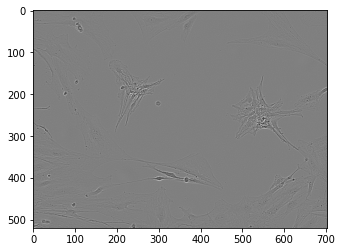

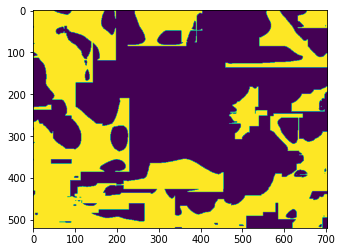

 10%|█         | 1/10 [00:02<00:26,  2.93s/it]

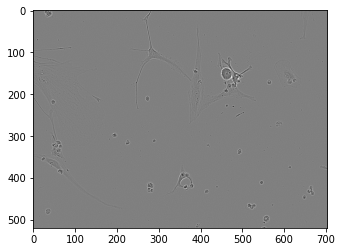

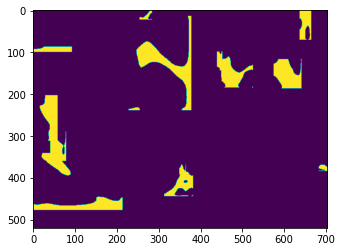

 20%|██        | 2/10 [00:03<00:13,  1.68s/it]

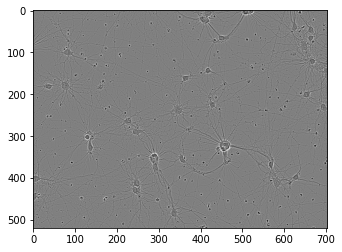

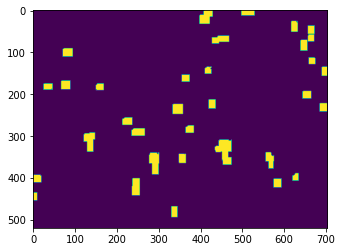

 30%|███       | 3/10 [00:05<00:11,  1.68s/it]

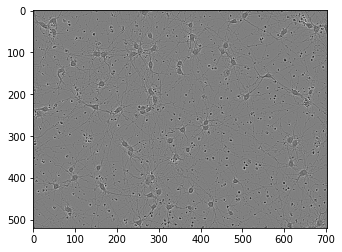

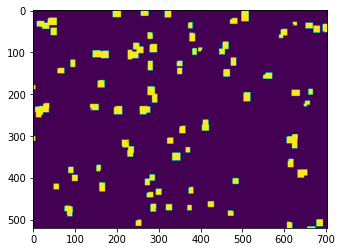

 40%|████      | 4/10 [00:08<00:13,  2.29s/it]

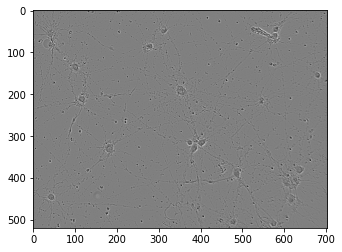

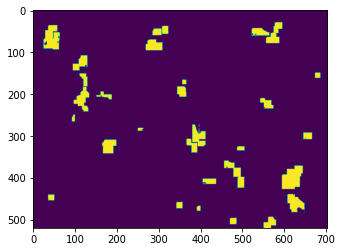

 50%|█████     | 5/10 [00:10<00:11,  2.27s/it]

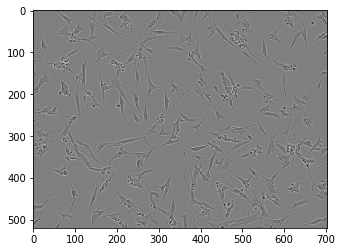

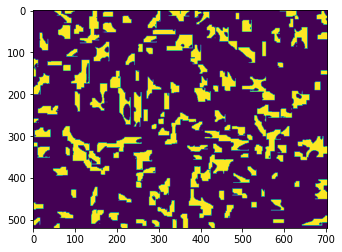

 60%|██████    | 6/10 [00:19<00:17,  4.39s/it]

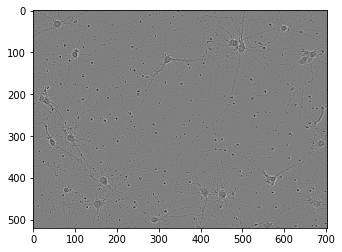

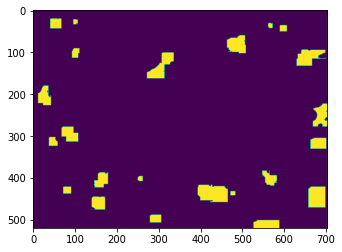

 70%|███████   | 7/10 [00:20<00:10,  3.44s/it]

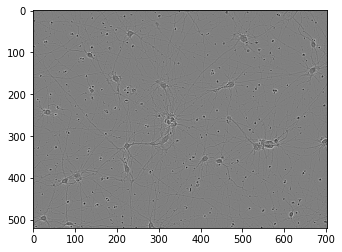

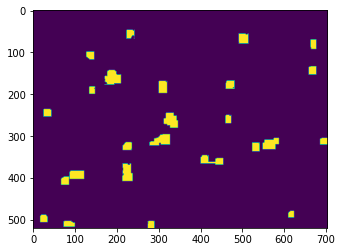

 80%|████████  | 8/10 [00:22<00:05,  2.83s/it]

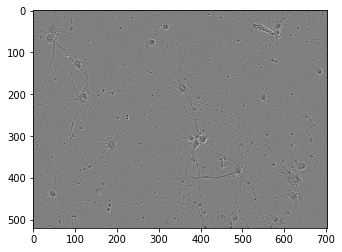

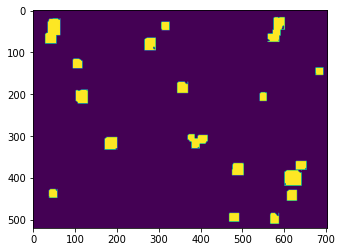

 90%|█████████ | 9/10 [00:23<00:02,  2.27s/it]

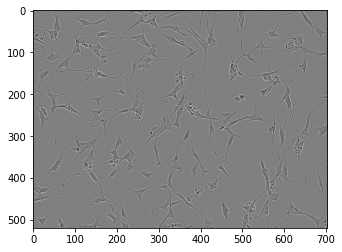

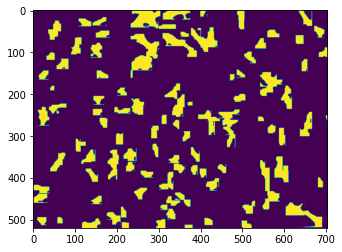

100%|██████████| 10/10 [00:29<00:00,  2.99s/it]


In [113]:
imgIds = val_coco.getImgIds()
imgIds = random.sample(imgIds, 10)
for imgId in tqdm(imgIds):
    img_file = val_coco.loadImgs(imgId)[0]['file_name']
    image_np = np.array(Image.open(os.path.join(image_path, img_file)).convert('RGB'))

    # 원본 이미지
    plt.imshow(image_np)
    plt.show()

    anns = val_coco.loadAnns(val_coco.getAnnIds(imgIds=imgId))

    mask_np = np.zeros(image_np.shape[:2])
    for ann in anns:
        x_min, y_min, width, height = ann['bbox']
        crop_file_path = os.path.join(crop_image_path, str(ann['id']) + '.png')
        result = inference_segmentor(model, crop_file_path)

        # result[0] = 0은 class가 0(cell)인 부분
        # mask_np에 cell 부분만 1씩 더해주는 코드
        mask_np[int(y_min):int(y_min+height), int(x_min):int(x_min+width)] += result[0] == 0
    
    # mask가 0보다 큰 부분은 255, 0인 부분은 그대로 0으로 채움
    mask_np = np.where(mask_np>0, 255, 0)
    plt.imshow(mask_np)
    plt.show()